# 实验3.1

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6.0)

**本代码依赖于python3以及其下的matplotlib,numpy**

In [29]:
class lsfit(object):
    """
    least-square fitting
    """
    
    def __init__(self, n):
        """
        n is the max polynomial order
        """
        
        self.n = n
        self.a = np.empty(n + 1)
        self.s_err = 0
        
    def fitdata(self, xarr, yarr):
        """
        (xarr, yarr) contain all the data points
        """        
    
        if len(xarr) != len(yarr):
            raise(ValueError("the length of x and y array need to be the same"))

        length = len(xarr)
        
        matr = np.zeros((self.n + 1, self.n + 1))
        for i in range(length):
            matr += self._sum_temp_mat(xarr[i], i)
        
        arr_y = np.zeros(self.n + 1)
        for i in range(length):
            arr_y += self._sum_temp_arr(xarr[i], yarr[i], i) 
        
        self.a = np.dot(np.linalg.inv(matr), arr_y)
        
        for i in range(length):
            self.s_err += (yarr[i] - self.fit_func(xarr[i]))**2
        
        
    def _sum_temp_mat(self, x, i):
        """
        the func used in the summation of the matrix leftside
        """
        
        mat = np.empty((self.n + 1, self.n + 1))
        for ii in range(self.n + 1):
            for jj in range(self.n + 1):
                mat[ii, jj] = x**(ii + jj)
                
        return mat
    
    
    def _sum_temp_arr(self, x, y, i):
        """
        the func used in the summation of the array rightside
        """
        
        arr = np.empty(self.n + 1)
        for ii in range(self.n + 1):
            arr[ii] = x**(ii) * y
            
        return arr
    
    
    def fit_func(self, x):
        """
        the function map obtained from fitting
        """
        s = 0
        
        for i in range(self.n + 1):
            s += self.a[i] * x**i
        
        return s
    
    
    def plot(self, xmin, xmax):
        """
        the plot func used to show the fitting result
        """
        
        x = np.linspace(xmin, xmax, 300)
        s = self.fit_func(x)
        
        plt.plot(x, s, label=str(self.n)+"-order fitting")            

## 下面代入数据进行计算

In [ ]:
if __name__ == "__main__":

    # preset all the parameters, including fitting order, and (x,y) points
    order = 3
    x = np.arange(-1.0, 2.1, 0.5)
    y = np.array([-4.447, -0.452, 0.551, 0.048, -0.447, 0.549, 4.552])

    # do the fitting
    fit_func = lsfit(order)
    fit_func.fitdata(x, y)

## 拟合曲线的参数$\{a_k\}$

In [33]:
a = fit_func.a
print(a)

[ 5.49119048e-01 -3.96825397e-05 -2.99766667e+00  1.99911111e+00]


<font size=4>上面即为从$a_0$依次到$a_3$  
即$a_0=0.549119048,\; a_1=-3.96825397\times10^{-5},\; a_2=-2.99766667,\;  a_3=1.99911111$</font>

## 平方误差$\delta^2$

In [34]:
fit_func.s_err

2.1761904761904066e-05

<font size=4>平方误差$\delta^2\approx 2.1762\times 10^{-5}$</font>

## 离散数据的拟合函数图形如下：

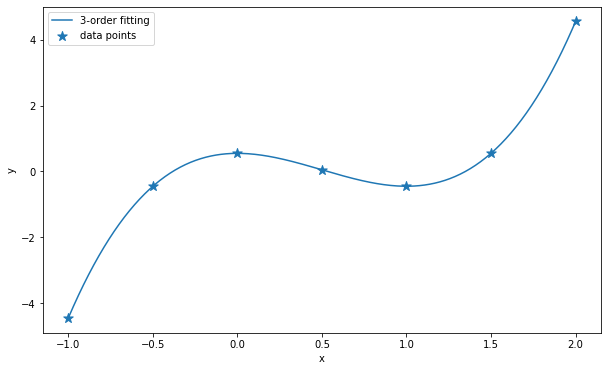

In [46]:
if __name__ == "__main__":
    
    fit_func.plot(-1, 2)
    plt.scatter(x, y, marker="*", s=100, label="data points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()